In [1]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mode

/home/minjihkim/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

Checking the evolution of BSE_Detailed_Output_29 with a = 1.56, essentially merges on ZAMS 

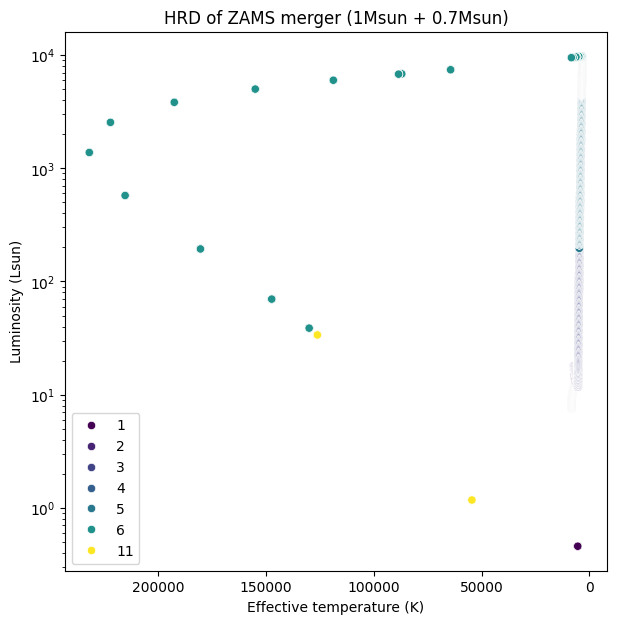

In [3]:
df = pd.read_csv('BSE_Detailed_Output_29.csv', sep = ',', header = 2)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(1)         ', y='     Luminosity(1)      ', hue='Stellar_Type(1)', palette='viridis', legend='full')
plt.gca().invert_xaxis()
plt.title('HRD of ZAMS merger (1Msun + 0.7Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

Checking the evolution of the primary in BSE_Detailed_Output_50, which experiences stable mass transfer & donates mass to its companion, becomes a He WD 

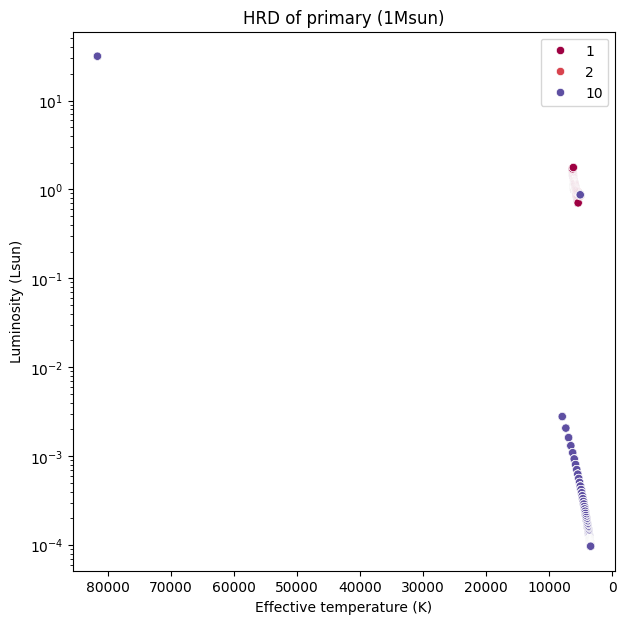

In [5]:
df = pd.read_csv('BSE_Detailed_Output_50.csv', sep = ',', header = 2)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(1)         ', y='     Luminosity(1)      ', hue='Stellar_Type(1)', palette='Spectral', legend='full')
plt.gca().invert_xaxis()
plt.title('HRD of primary (1Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

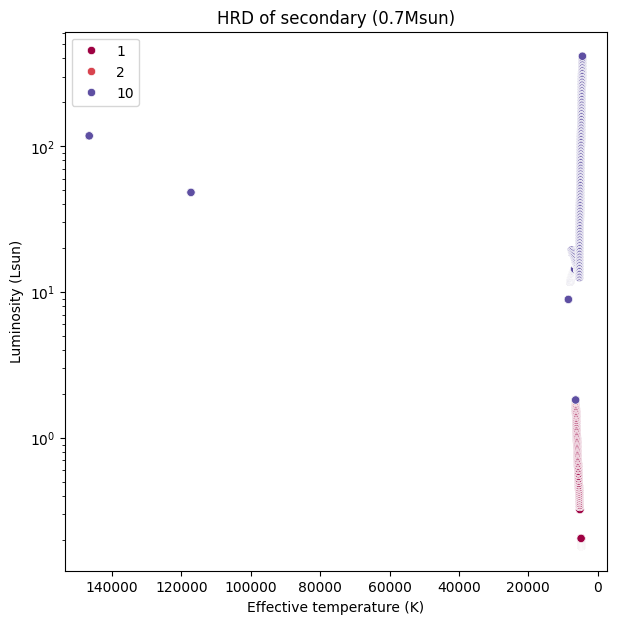

In [6]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(2)         ', y='     Luminosity(2)      ', hue='Stellar_Type(1)', palette='Spectral', legend='full')
plt.gca().invert_xaxis()
plt.title('HRD of secondary (0.7Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

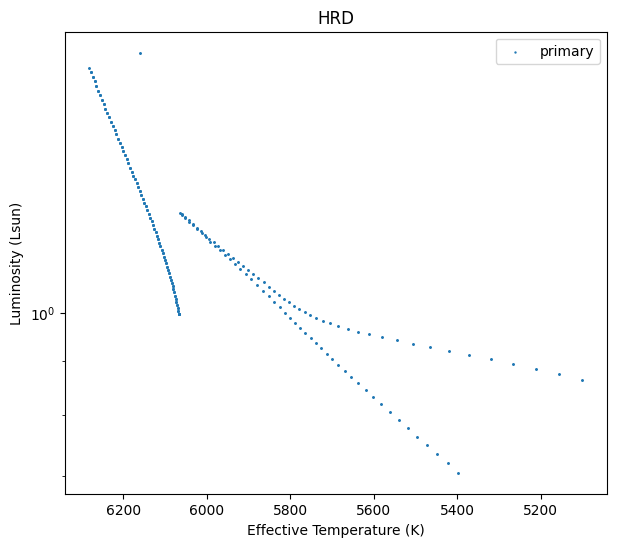

In [7]:
df1 = restrict(df, 'Stellar_Type(1)', 0, 1) #MS stars only
plt.figure(figsize=(7,6))
plt.scatter(df1['        Teff(1)         '], df1['     Luminosity(1)      '], s = 0.5, label = 'primary')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.title('HRD')
plt.legend()

In [8]:
M1_init = 1 #Msun, primary
M2_init = 0.7 #Msun, secondary

RLOF = pd.read_csv(r'/home/minjihkim/COMPAS/src/Z_0.008/BSE_RLOF.csv', sep = ',', header = 2)
nuclear_0 = []
thermal_0 = []

nuclear_1 = []
thermal_1 = []

ZAMS_merger_a = []
overcontact_a = []
MS_merger_a = []
beyond_MS_merger_a = []
no_merger_a = []
MS_MT_a = []
non_MS_MT_a = []
no_MT_a = []
MS_types = [0,1]

SP = pd.read_csv(r'/home/minjihkim/COMPAS/src/Z_0.008/BSE_System_Parameters.csv', sep = ',', header = 2)

In [9]:
def record_MT_timescale(seed, a_0):
    try:
        MT_timescale_0 = RLOF[RLOF['    SEED    '] == seed]['MassTransferTimescale'].values[0]
    except IndexError:
        MT_timescale_0 = -1  

    if int(MT_timescale_0) == 1:
        nuclear_0.append(a_0)
    elif int(MT_timescale_0) == 2:
        thermal_0.append(a_0)

    MT_timescales = RLOF[RLOF['    SEED    '] == seed]['MassTransferTimescale'].values
    if len(MT_timescales) > 0:    
        majority_value, _ = mode(MT_timescales, keepdims=False)
    else:
        majority_value = -1  

    if majority_value == 1:
        nuclear_1.append(a_0)
    elif int(MT_timescale_0) == 2:
        thermal_1.append(a_0)

In [10]:
for n in range(0,100):
    df = pd.read_csv('BSE_Detailed_Output_'+str(n)+'.csv', sep = ',', header = 2)   

    M1_0 = float(df['        Mass(1)         '][0])
    M2_0 = float(df['        Mass(2)         '][0])
    a_0 = float(SP['   SemiMajorAxis@ZAMS   '][n])

    df_seed = int(df['    SEED    '][0])    
    record_MT_timescale(df_seed, a_0)

    if M1_0 > M1_init:
        ZAMS_merger_a.append(a_0)
    elif M1_0 == M2_0 and M1_0 == (M1_init+M2_init)/2:
        overcontact_a.append(a_0)
    else:
        merged = False
        MT = False

        for i in range(df.shape[0]):
            type2 = int(df['Stellar_Type(2)'][i])
            type1 = int(df['Stellar_Type(1)'][i])
            if type2 == 15: #mass-less remnant
                if type1 in MS_types:
                    MS_merger_a.append(a_0)
                else:
                    beyond_MS_merger_a.append(a_0)
                merged = True
                break

            if not MT and int(df['MT_History'][i]): #if != 0, there was a mass transfer
                if type1 in MS_types:
                    MS_MT_a.append(a_0)
                else:
                    non_MS_MT_a.append(a_0)
                MT = True
                
        if not merged:
            no_merger_a.append(a_0)
        if not MT:
            no_MT_a.append(a_0)

MT_History:
- NO MASS TRANSFER = 0
- MASS TRANSFER STABLE STAR1 -> STAR2 = 1
- MASS TRANSFER STABLE STAR2 -> STAR1 = 2
- MASS TRANSFER COMMON ENVELOPE STAR1 -> STAR2 = 3
- MASS TRANSFER COMMON ENVELOPE STAR2 -> STAR1 = 4
- MASS TRANSFER COMMON ENVELOPE DOUBLE CORE = 5
- MASS TRANSFER -> MERGER = 6

In [11]:
def AU_to_Rsol(a1_AU, a2_AU):
    a1_Rsol = round(a1_AU*214.9394693836, 4)
    a2_Rsol = round(a2_AU*214.9394693836, 4)
    return str(a1_Rsol) + " to " + str(a2_Rsol) + " Rsol"

In [13]:
lists = [ZAMS_merger_a, overcontact_a, MS_merger_a, beyond_MS_merger_a, MS_MT_a, non_MS_MT_a, no_merger_a, no_MT_a]
descriptions = ["ZAMS merger:", "Overcontact binaries at ZAMS:", "MS merger (excluding ZAMS merger and overcontact binaries):", 
                "Merger following Cases B and C:", "Mass transfer from MS donor:", "Mass transfer from non-MS donor:", "No merger throughout the evolution:", 
                "No mass transfer throughout the evolution:"]

print("Initial (i.e. ZAMS) semi-major axis for: ")
for i in range(len(lists)):
    if lists[i] != []:
        print(descriptions[i], lists[i][0], "to", lists[i][-1], "AU   or  ", AU_to_Rsol(lists[i][0], lists[i][-1]))

Initial (i.e. ZAMS) semi-major axis for: 
ZAMS merger: 1e-05 to 0.00701 AU   or   0.0021 to 1.5067 Rsol
Overcontact binaries at ZAMS: 0.00726 to 0.01026 AU   or   1.5605 to 2.2053 Rsol
MS merger (excluding ZAMS merger and overcontact binaries): 0.01051 to 0.02001 AU   or   2.259 to 4.3009 Rsol
Mass transfer from MS donor: 0.01051 to 0.02101 AU   or   2.259 to 4.5159 Rsol
Mass transfer from non-MS donor: 0.02126 to 0.02476 AU   or   4.5696 to 5.3219 Rsol
No merger throughout the evolution: 0.01251 to 0.02476 AU   or   2.6889 to 5.3219 Rsol


Initial (i.e. ZAMS) semi-major axis for: 
ZAMS merger: 1e-05 to 0.00701 AU   or   0.0021 to 1.5067 Rsol
Overcontact binaries at ZAMS: 0.00726 to 0.01026 AU   or   1.5605 to 2.2053 Rsol
MS merger (excluding ZAMS merger and overcontact binaries): 0.01051 to 0.02001 AU   or   2.259 to 4.3009 Rsol
Mass transfer from MS donor: 0.01051 to 0.02101 AU   or   2.259 to 4.5159 Rsol
Mass transfer from non-MS donor: 0.02126 to 0.02476 AU   or   4.5696 to 5.3219 Rsol
No merger throughout the evolution: 0.01251 to 0.02476 AU   or   2.6889 to 5.3219 Rsol

BSE_Detailed_Output_50.csv with initial a = 2.69005068304924 does not merge
also the next a (BSE_Detailed_Output_51.csv) does not merge either

But BSE_Detailed_Output_80.csv with initial a = 4.30279090070466 does actually merge on MS

In [14]:
lists = [nuclear_0, thermal_0, nuclear_1, thermal_1]
descriptions = ["Nuclear timescale mass transfer (initially):", 
                "Thermal timescale mass transfer (initially):",
                "Nuclear timescale mass transfer (majority):", 
                "Thermal timescale mass transfer (majority):"]
print("Initial (i.e. ZAMS) semi-major axis for: ")
for i in range(len(lists)):
    if lists[i] != []:
        print(descriptions[i], lists[i][0], "to", lists[i][-1], "AU   or  ", AU_to_Rsol(lists[i][0], lists[i][-1]))

Initial (i.e. ZAMS) semi-major axis for: 
Nuclear timescale mass transfer (initially): 0.01401 to 0.01601 AU   or   3.0113 to 3.4412 Rsol
Thermal timescale mass transfer (initially): 0.01051 to 0.02476 AU   or   2.259 to 5.3219 Rsol
Nuclear timescale mass transfer (majority): 0.01051 to 0.01601 AU   or   2.259 to 3.4412 Rsol
Thermal timescale mass transfer (majority): 0.01326 to 0.02476 AU   or   2.8501 to 5.3219 Rsol


/tmp/ipykernel_16222/3362079540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RLOF_1['norm_radius'] = RLOF_1.groupby('    SEED    ')['      Radius(1)<MT      '].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


Text(0.5, 1.0, 'Radius of primary (Minit = 1Msun) before mass transfer (primary donor only)')

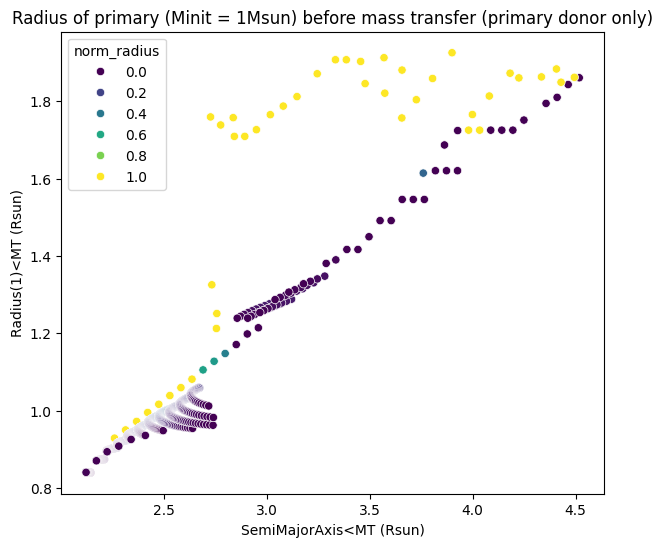

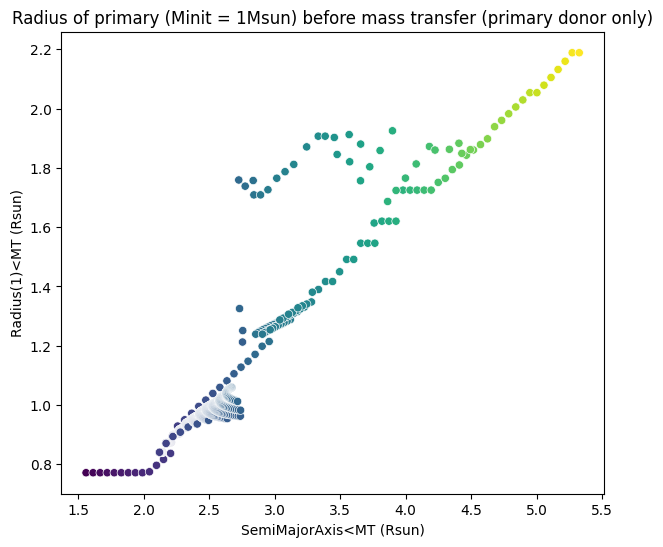

In [15]:
RLOF_1 = restrict(RLOF, '    SemiMajorAxis<MT    ', 0, 10) #0 to 10 Rsun only
RLOF_1['norm_radius'] = RLOF_1.groupby('    SEED    ')['      Radius(1)<MT      '].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(7,6))
sns.scatterplot(data=RLOF_1, 
                x='    SemiMajorAxis<MT    ', 
                y='      Radius(1)<MT      ', 
                hue='norm_radius', 
                palette='viridis')
#plt.scatter(RLOF_1['    SemiMajorAxis<MT    '], RLOF_1['      Radius(1)<MT      '], s = 1)
plt.xlabel('SemiMajorAxis<MT (Rsun)')
plt.ylabel('Radius(1)<MT (Rsun)')
plt.title('Radius of primary (Minit = 1Msun) before mass transfer (primary donor only)') #exclude mass transfer from star 2

plt.figure(figsize=(7,6))
sns.scatterplot(data=RLOF_1, 
                x='    SemiMajorAxis<MT    ', 
                y='      Radius(1)<MT      ', 
                hue='    SEED    ', 
                palette='viridis',
                legend=False)
plt.xlabel('SemiMajorAxis<MT (Rsun)')
plt.ylabel('Radius(1)<MT (Rsun)')
plt.title('Radius of primary (Minit = 1Msun) before mass transfer (primary donor only)') #exclude mass transfer from star 2